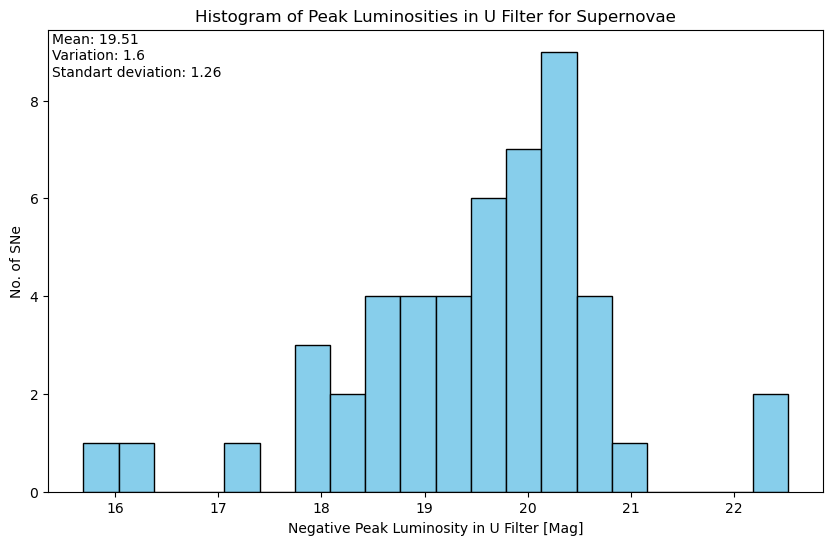

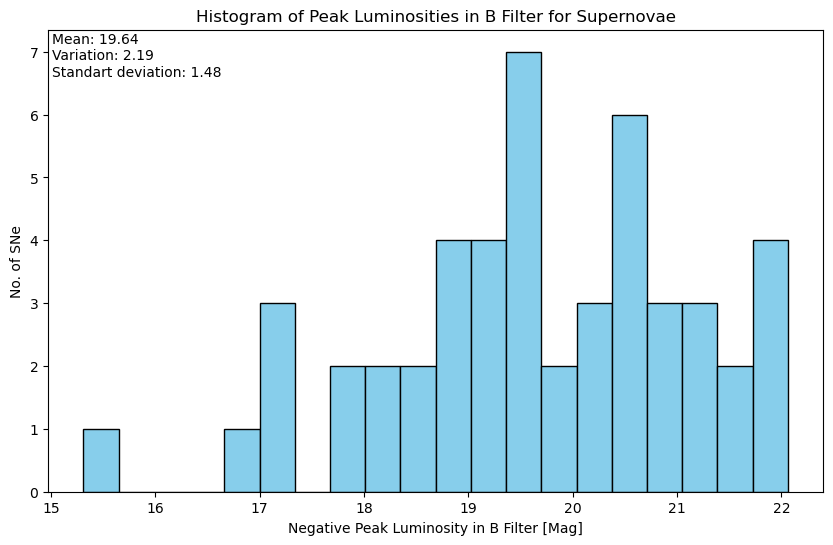

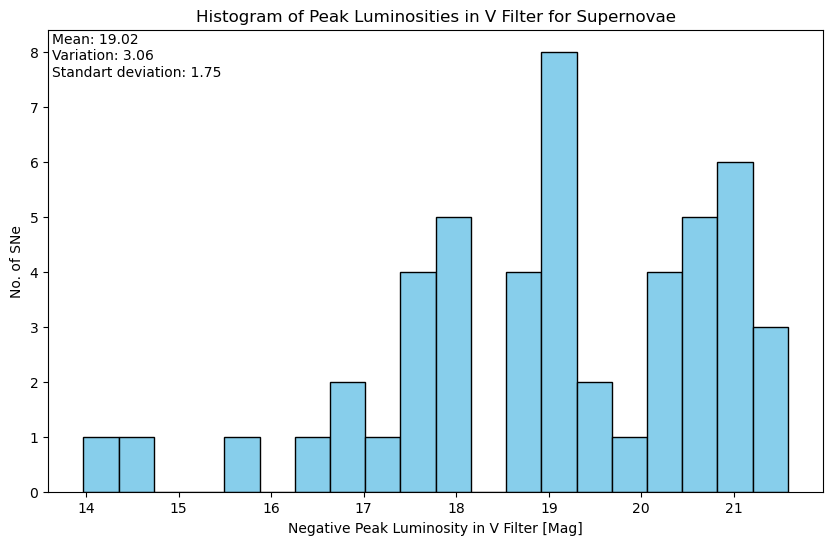

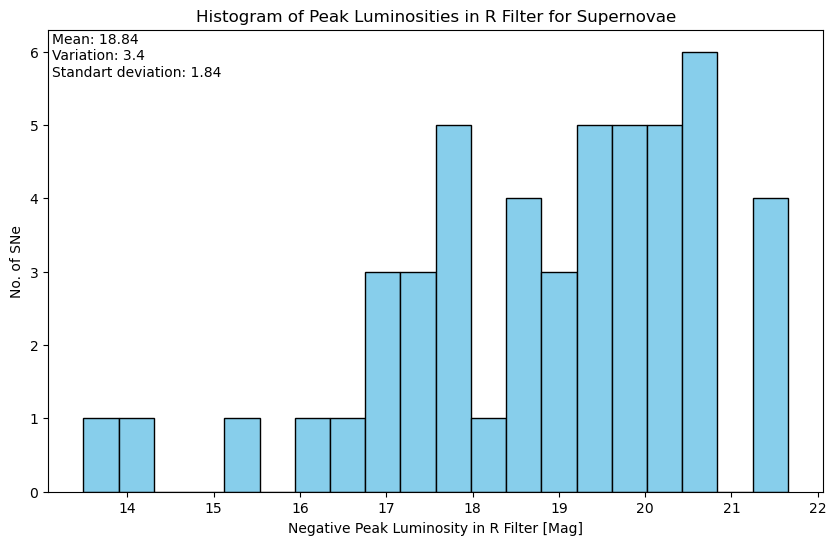

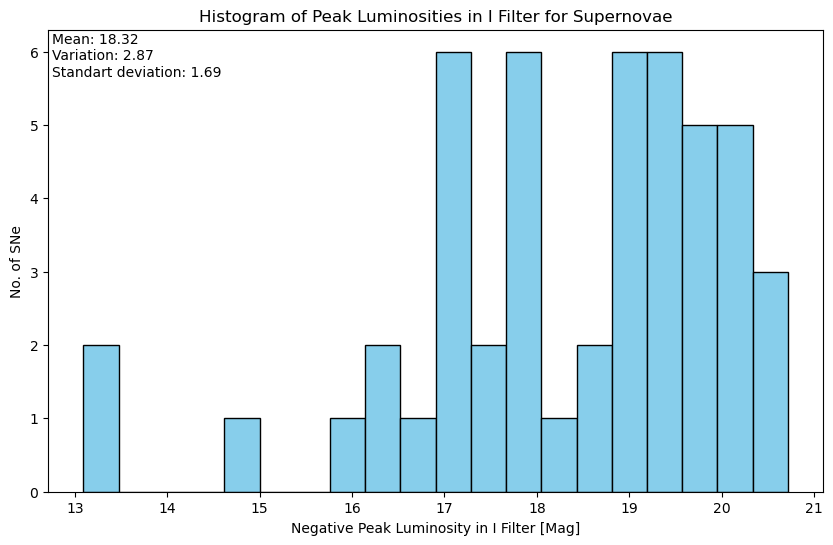

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

u_list = []
b_list = []
v_list = []
r_list = []
i_list = []
filters = [["U",u_list], ["B",b_list], ["V",v_list], ["R",r_list], ["I",i_list]]


for file in glob.glob("Supernova_all/cfalc_allsn/*.dat"):
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, 
                           names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # Replace invalid data with NaN
        df[df == 99.999] = float("NaN")
        df[df == 99.99] = float("NaN")
        
        for f,d in filters:
            peak_lum = df[f].max()
            d.append(peak_lum)
        
        
    except Exception as e:
        #print(f"{file} ignored due to error: {e}")
        pass


for f,d in filters:
    mean_lum = round(np.mean(d), 2)
    var_lum = round(np.var(d), 2)
    std_lum = round(np.std(d), 2)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(d, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'Negative Peak Luminosity in {f} Filter [Mag]')
    plt.ylabel('No. of SNe')
    plt.title(f'Histogram of Peak Luminosities in {f} Filter for Supernovae')
    plt.text(0.005 , 0.9 , f'Mean: {mean_lum} \nVariation: {var_lum} \nStandart deviation: {std_lum}', 
             transform=plt.gca().transAxes )
    plt.show()

We can observe that the mean peak brightness for each filter are similar, around -19 Mag. The distribution resembles a normal distribution except a few outliers around the lower magnitudes. The distribution is skewed to the right, towards the larger magnitudes, which is to be expected for a standard candle. 